In [42]:
import os 
import pandas as pd
import numpy as np
from pydub import AudioSegment

import IPython.display as ipd

import librosa
import librosa.display
import matplotlib.pyplot as plt

import processing

In [43]:
import sys
sys.path.insert(1, '/Users/bastienorset/Documents/git/tqwt_tools')

In [44]:
from tqwt_tools import DualQDecomposition
from tqwt_tools.util import (
    low_resonance_test_signal, 
    high_resonance_test_signal, 
    speech_signal, 
    music_signal
)

In [45]:
def decompose_and_plot(x: np.ndarray, dq_params: dict, figsize: tuple = (16, 10), 
                       display_audio: bool = False):
    # perform decomposition
    dq = DualQDecomposition(**dq_params)
    x1, x2 = dq(x)
    return x1,x2,x-(x1+x2)

In [5]:
audio_folder = '../../data/ICBHI_final_database'

In [34]:

audio_file  = '222_1b1_Pr_sc_Meditron'
 #audio_file = '223_1b1_Lr_sc_Meditron'
audio_file= processing.load_file_from_recording_name(audio_folder,audio_file)
data_filtered_original,df_label = processing.preprocess_data(audio_file,annotations='event')
data_feature_original = processing.apply_wavelets(data_filtered_original)

In [38]:
data_feature_original2 = data_feature_original.copy()
data_feature_original2['data'] = (data_feature_original2['data'] - np.min(data_feature_original2['data']))/(np.max(data_feature_original2['data']) - np.min(data_feature_original2['data']))

(0.0, 73.35)

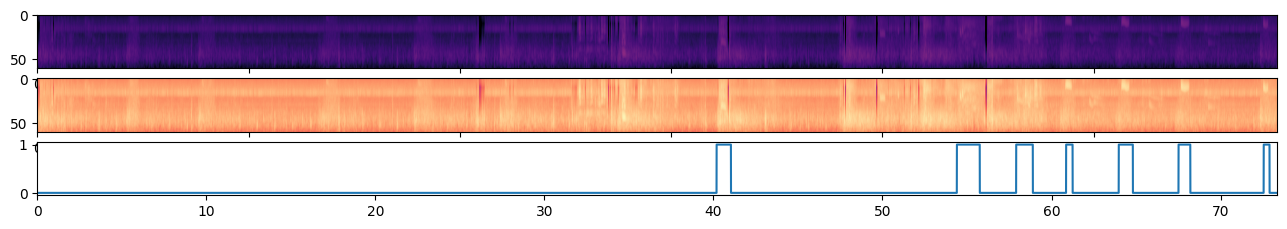

In [41]:
f = plt.figure(figsize = (16,4))
ax = f.add_subplot(511)
ax.imshow(data_feature_original['data'], cmap='magma', aspect='auto', norm=None, vmax=100, vmin=-100)
ax = f.add_subplot(512)
ax.imshow(data_feature_original2['data'], cmap='magma', aspect='auto', norm=None)
ax = f.add_subplot(513)
ax.plot(data_filtered_original['time'],data_filtered_original['label'])
ax.set_xlim([data_filtered_original['time'][0],data_filtered_original['time'][-1]])

In [ ]:
dq_params = {
    'q1': 6,
    'redundancy_1': 3,
    'stages_1': 32,
    'q2': 1,
    'redundancy_2': 3,
    'stages_2': 3,
    'lambda_1': 0.1,
    'lambda_2': 0.1,
    'mu': 0.5,
    'num_iterations': 80,
    'compute_cost_function': True
}
x1,x2,xrest = decompose_and_plot(data_filtered_original['data'], dq_params)

In [ ]:
data_filtered_low = data_filtered_original.copy()
data_filtered_low['data'] = x2
data_feature_low = processing.apply_wavelets(data_filtered_low)


data_filtered_high = data_filtered_original.copy()
data_filtered_high['data'] = x1
data_feature_high = processing.apply_wavelets(data_filtered_high)


data_filtered_rest= data_filtered_original.copy()
data_filtered_rest['data'] = xrest
data_feature_rest = processing.apply_wavelets(data_filtered_rest)


f = plt.figure(figsize = (16,4))
ax = f.add_subplot(511)
ax.imshow(data_feature_original['data'], cmap='magma', aspect='auto', norm=None, vmax=0, vmin=-100,
          extent=[data_filtered_low['time'][0],data_filtered_low['time'][-1],data_feature_original['freq'][0],data_feature_original['freq'][-1]])
ax = f.add_subplot(512)
ax.imshow(data_feature_low['data'], cmap='magma', aspect='auto', norm=None, vmax=0, vmin=-100,
          extent=[data_filtered_original['time'][0],data_filtered_original['time'][-1],data_feature_low['freq'][0],data_feature_low['freq'][-1]])
ax = f.add_subplot(513)
ax.imshow(data_feature_high['data'], cmap='magma', aspect='auto', norm=None, vmax=0, vmin=-100,
          extent=[data_filtered_original['time'][0],data_filtered_original['time'][-1],data_feature_high['freq'][0],data_feature_high['freq'][-1]])
ax = f.add_subplot(514)
ax.imshow(data_feature_rest['data'], cmap='magma', aspect='auto', norm=None, vmax=0, vmin=-100,
          extent=[data_filtered_original['time'][0],data_filtered_original['time'][-1],data_feature_rest['freq'][0],data_feature_rest['freq'][-1]])
ax = f.add_subplot(515)
ax.plot(data_filtered_low['time'],data_filtered_low['label'])
ax.set_xlim([data_filtered_low['time'][0],data_filtered_low['time'][-1]])
